In [23]:
import qiskit.tools.jupyter
%qiskit_version_table

# Hands on 4


This hands on delves deeper into using the IBM Quantum cloud. You'll see the following topic simulator parameters, using GPUs in simulators, and noise simulation.

## Using your IBM credentials locally

The IBM Quantum account has functions for handling administrative tasks. The credentials can be saved to disk, or used in a session and never saved.

* `enable_account(TOKEN, HUB, GROUP, PROJECT)`: Enable your account in the current session and optionally specify a default provider to return.
* `save_account(TOKEN, HUB, GROUP, PROJECT)`: Save your account to disk for future use, and optionally specify a default provider to return when loading your account.
* `load_account()`: Load account using stored credentials.
* `disable_account()`: Disable your account in the current session.
* `stored_account()`: List the account stored to disk.
* `active_account()`: List the account currently in the session.
* `delete_account()`: Delete the saved account from disk.


In [151]:
from qiskit import IBMQ
# Enter your token from the IBM cloud here for temporary activation (I have mine saved, so not necessary)
#if IBMQ.active_account() == None :
#    print("Enabling saved account")
#    IBMQ.enable_account("your token here")
#else:
#    print("Currently active account:", IBMQ.active_account())
### If you have used save_account beforehand, you can load it here
if (IBMQ.active_account() is None) and (IBMQ.stored_account() is not None) :
    print("Loading saved account")
    provider = IBMQ.load_account()
#


As a part of the education problem, probably you have access to at least two providers.

In [152]:
IBMQ.providers()    # List all available providers

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='mid-east-tech-un-1', project='2300343-Intro-Computational-Methods')>,
 <AccountProvider for IBMQ(hub='ibm-q-education', group='odtu-metu-1', project='intro-to-qua')>]

Let's select the `hub='ibm-q-education', group='mid-east-tech-un-1'` (since it has more resources, and less wait time). Each provider provides access to a number of _backends_ i.e. quantum computers.

In [168]:
# If you have access to more than one hub:
provider = IBMQ.get_provider(hub='ibm-q-education', group='mid-east-tech-un-1')
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]



AttributeError: 'IBMQSimulator' object has no attribute 'has_service'

Each quantum computer has different characteristics. Remember, it is not just the number of qubit, but also how the qubits are connected matters. You can check the topologies in the IBM Q webpage

## Qiskit Visualization tools

Within the physics community, the qubits of a multi-qubit systems are typically ordered with the first qubit on the left-most side of the tensor product and the last qubit on the right-most side. For instance, if the first qubit is in state |0⟩ and second is in state |1⟩, their joint state would be|01⟩. Qiskit uses a slightly different ordering of the qubits, in which the qubits are represented from the most significant bit (MSB) on the left to the least significant bit (LSB) on the right (big-endian). This is similar to bitstring representation on classical computers, and enables easy conversion from bitstrings to integers after measurements are performed. For the example just given, the joint state would be represented as ∣10⟩.

Importantly, this change in the representation of multi-qubit states affects the way multi-qubit gates are represented in Qiskit, as discussed [here](htps://qiskit.org/documentation/tutorials/circuits/3_summary_of_quantum_operations.html#Two-qubit-gates_)

The representation used in Qiskit enumerates the basis vectors in increasing order of the integers they represent. For instance, the basis vectors for a 2-qubit system would be ordered as $ \left|00\right\rangle$, $ \left|01\right\rangle $, $ \left|10\right\rangle $, and $ \left|11\right\rangle $. Thinking of the basis vectors as bit strings, they encode the integers 0,1,2 and 3, respectively.

We have already seen how to plot the results in a histogram. There are other visualization tools that are useful when working with quantum computers, let's explore them.

### Plot a state

In many situations you want to see the state of a quantum computer. This could be for debugging. Here we assume you have this state (either from simulation or state tomography) and the goal is to visualize the quantum state. This requires exponential resources, so we advise to only view the state of small quantum systems. There are several functions for generating different types of visualization of a quantum state



```
plot_state_city(quantum_state)
plot_state_qsphere(quantum_state)
plot_state_paulivec(quantum_state)
plot_state_hinton(quantum_state)
plot_bloch_multivector(quantum_state)
```



A quantum state is either a state matrix $ \rho $ (Hermitian matrix) or statevector $  \left|\psi\right\rangle  $ (complex vector). The state matrix is related to the statevector by
$$ \rho =  \left| \psi \right\rangle\!\left\langle \psi \right|  $$

The visualizations generated by the functions are:

`'plot_state_city'`: The standard view for quantum states where the real and imaginary (imag) parts of the state matrix are plotted like a city.

`'plot_state_qsphere'`: The Qiskit unique view of a quantum state where the amplitude and phase of the state vector are plotted in a spherical ball. 
The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component.

`'plot_state_paulivec'`: The representation of the state matrix using Pauli operators as the basis. 

`'plot_state_hinton'`: Same as 'city' but where the size of the element represents the value of the matrix element.

`'plot_bloch_multivector'`: The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.

In [49]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [50]:
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)

In [51]:
backend = Aer.get_backend('statevector_simulator') # the device to run on
result = backend.run(circuit).result()
psi  = result.get_statevector(circuit)

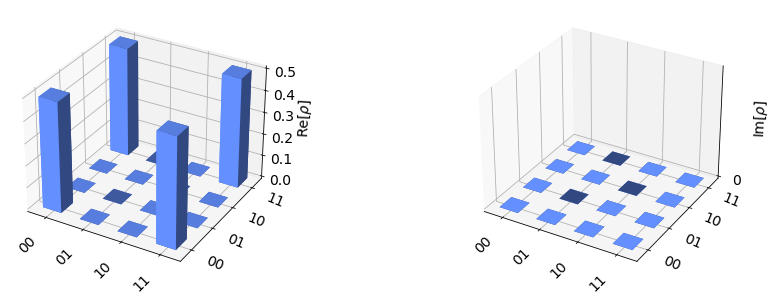

In [52]:
plot_state_city(psi)

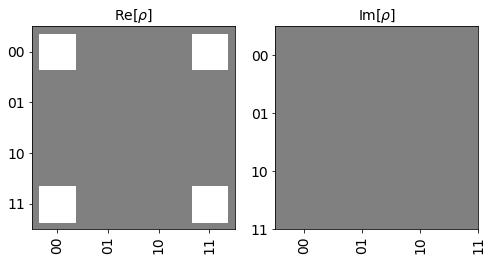

In [53]:
plot_state_hinton(psi)

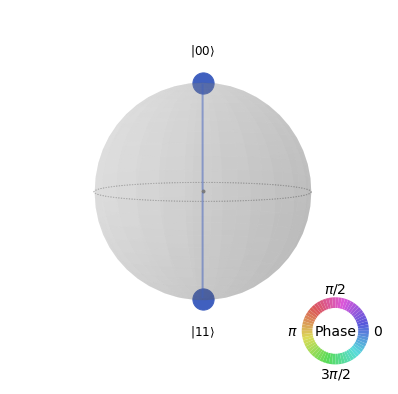

In [54]:
plot_state_qsphere(psi)

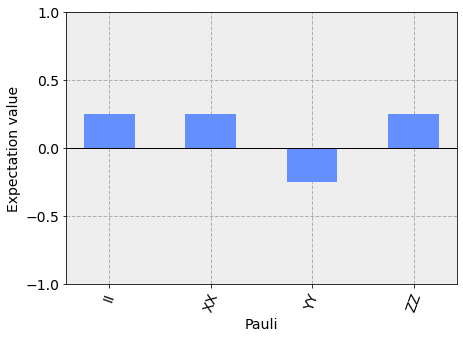

In [55]:
plot_state_paulivec(psi)

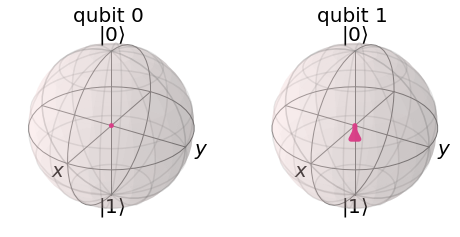

In [56]:
plot_bloch_multivector(psi)

#### Plot Bloch Vector

A standard way of plotting a quantum system is using the Bloch vector. This only works for a single qubit and takes as input the Bloch vector.

In [60]:
from qiskit.visualization import plot_bloch_vector

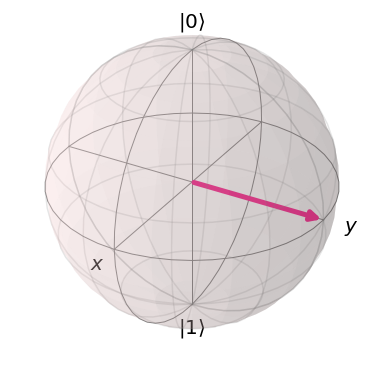

In [61]:
plot_bloch_vector([0,1,0])

#### Circuit Visualization

When building a quantum circuit, it often helps to draw the circuit. This is supported natively by a ``QuantumCircuit`` object. You can either call ``print()`` on the circuit, or call the ``draw()`` method on the object.

In [62]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

In [63]:
# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.measure(range(3), range(3));

In [64]:
print(circuit)

     ┌───┐          ┌─┐   
q_0: ┤ H ├───────■──┤M├───
     ├───┤┌───┐┌─┴─┐└╥┘┌─┐
q_1: ┤ X ├┤ H ├┤ X ├─╫─┤M├
     ├───┤└┬─┬┘└───┘ ║ └╥┘
q_2: ┤ H ├─┤M├───────╫──╫─
     └───┘ └╥┘       ║  ║ 
c: 3/═══════╩════════╩══╩═
            2        0  1 


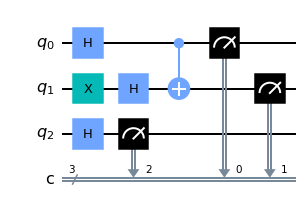

In [65]:
circuit.draw(output='mpl')

There are different drawing formats. The parameter output (str) selects the output method to use for drawing the circuit. Valid choices are ``text, mpl, latex, latex_source``. See [qiskit.circuit.QuantumCircuit.draw](https://qiskit.org/documentation/stubs/qiskit.circuit.QuantumCircuit.draw.html?highlight=draw)

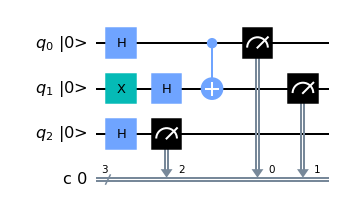

In [66]:
circuit.draw(initial_state=True, output='mpl')

Depending on the output, there are also options to customize the circuit diagram rendered by the circuit.

##### Disable Plot Barriers and Reversing Bit Order

The first two options are shared among all three backends. They allow you to configure both the bit orders and whether or not you draw barriers. These can be set by the ``reverse_bits`` `kwarg and ``plot_barriers`` kwarg, respectively. The examples below will work with any output backend; mpl is used here for brevity.

In [67]:
# Draw a new circuit with barriers and more registers

q_a = QuantumRegister(3, name='qa')
q_b = QuantumRegister(5, name='qb')
c_a = ClassicalRegister(3)
c_b = ClassicalRegister(5)

circuit = QuantumCircuit(q_a, q_b, c_a, c_b)

circuit.x(q_a[1])
circuit.x(q_b[1])
circuit.x(q_b[2])
circuit.x(q_b[4])
circuit.barrier()
circuit.h(q_a)
circuit.barrier(q_a)
circuit.h(q_b)
circuit.cswap(q_b[0], q_b[1], q_b[2])
circuit.cswap(q_b[2], q_b[3], q_b[4])
circuit.cswap(q_b[3], q_b[4], q_b[0])
circuit.barrier(q_b)
circuit.measure(q_a, c_a)
circuit.measure(q_b, c_b);

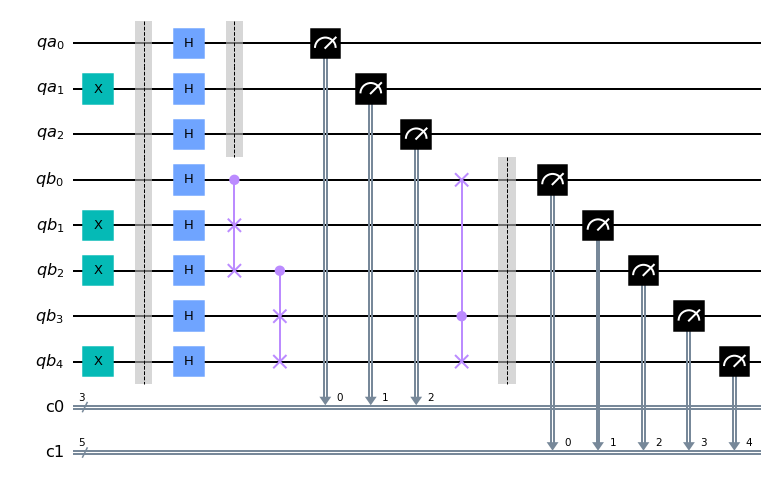

In [68]:
# Draw the circuit
circuit.draw(output='mpl')

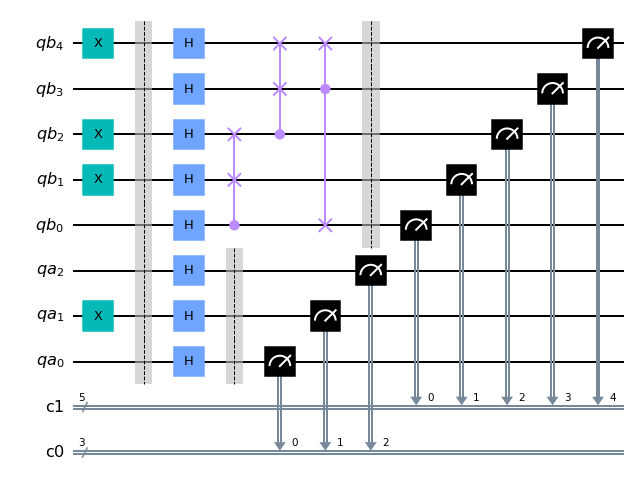

In [69]:
# Draw the circuit with reversed bit order
circuit.draw(output='mpl', reverse_bits=True)

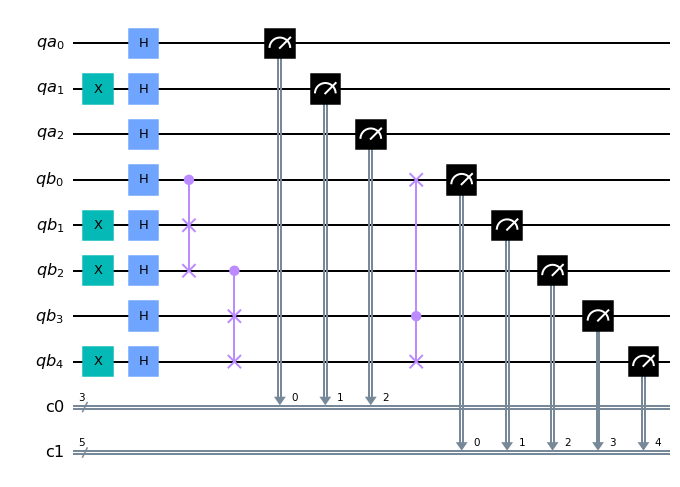

In [70]:
# Draw the circuit without barriers
circuit.draw(output='mpl', plot_barriers=False)

##### Backend specific costumizations

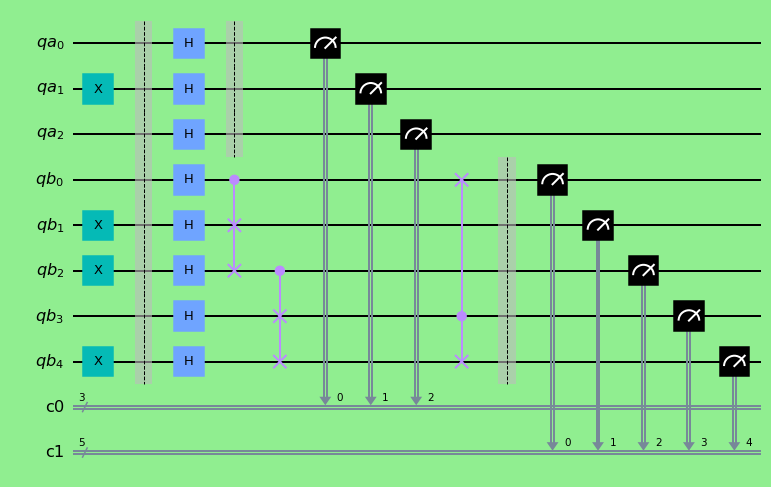

In [71]:
# Change the background color in mpl

style = {'backgroundcolor': 'lightgreen'}

circuit.draw(output='mpl', style=style)

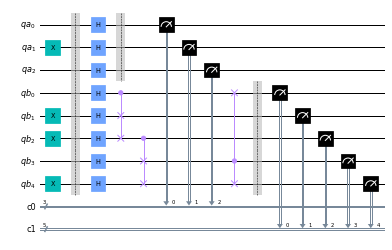

In [72]:
# Scale the mpl output to 1/2 the normal size
circuit.draw(output='mpl', scale=0.5)

We can also use ``circuit_drawer()`` as a function

In [74]:
from qiskit.tools.visualization import circuit_drawer

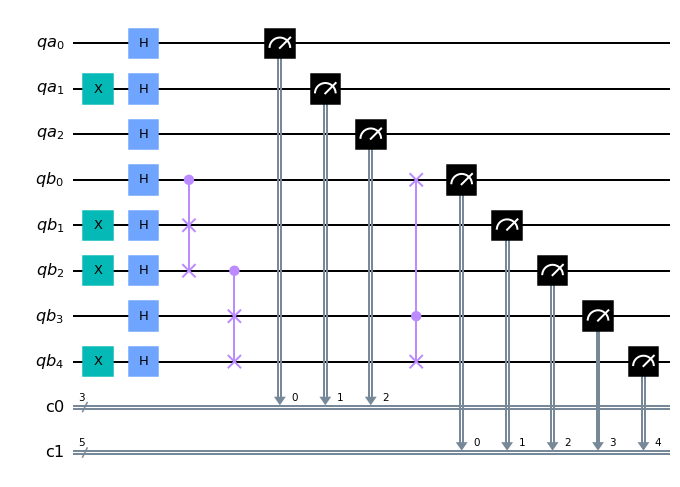

In [75]:
circuit_drawer(circuit, output='mpl', plot_barriers=False)

### Simulators 

Now we will show how to import the Qiskit Aer simulator backend and use it to run ideal (noise free) Qiskit Terra circuits.

In [76]:
import numpy as np

# Import Qiskit
from qiskit import QuantumCircuit
from qiskit import Aer, transpile
from qiskit.tools.visualization import plot_histogram, plot_state_city
import qiskit.quantum_info as qi

The Aer provider contains a variety of high performance simulator backends for a variety of simulation methods. The available backends on the current system can be viewed using ``Aer.backends``

In [77]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_statevector_gpu'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_density_matrix_gpu'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_unitary_gpu'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator'),
 PulseSimulator('pulse_simulator')]

The main simulator backend of the Aer provider is the ``AerSimulator`` backend. A new simulator backend can be created using ``Aer.get_backend('aer_simulator')``.

In [78]:
simulator = Aer.get_backend('aer_simulator')

The default behavior of the ``AerSimulator`` backend is to mimic the execution of an actual device. If a ``QuantumCircuit`` containing measurements is run it will return a count dictionary containing the final values of any classical registers in the circuit. The circuit may contain gates, measurements, resets, conditionals, and other custom simulator instructions 

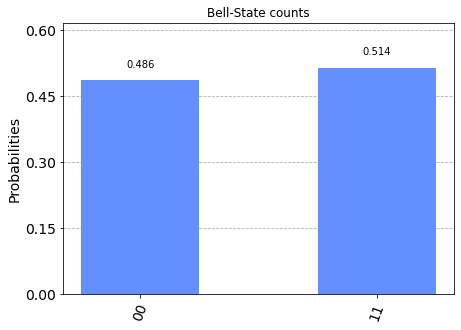

In [79]:
# Create circuit
circ = QuantumCircuit(2)
circ.h(0)
circ.cx(0, 1)
circ.measure_all()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
plot_histogram(counts, title='Bell-State counts')

In [80]:
# Run and get memory (measurement outcomes for each individual shot)
result = simulator.run(circ, shots=10, memory=True).result()
memory = result.get_memory(circ)
print(memory)

['11', '11', '00', '00', '11', '00', '00', '11', '00', '11']


##### Simulation methods

The AerSimulator supports a variety of simulation methods, each of which supports a different set of instructions. The method can be set manually using ``simulator.set_option(method=value)`` option, or a simulator backend with a preconfigured method can be obtained directly from the Aer provider using ``Aer.get_backend``.

When simulating ideal circuits, changing the method between the exact simulation methods stabilizer, ``statevector``, ``density_matrix`` and ``matrix_product_state`` should not change the simulation result (other than usual variations from sampling probabilities for measurement outcomes)

Each of these methods determines the internal representation of the quantum circuit and the algorithms used to process the quantum operations. They each have advantages and disadvantages, and choosing the best method is a matter of investigation. 

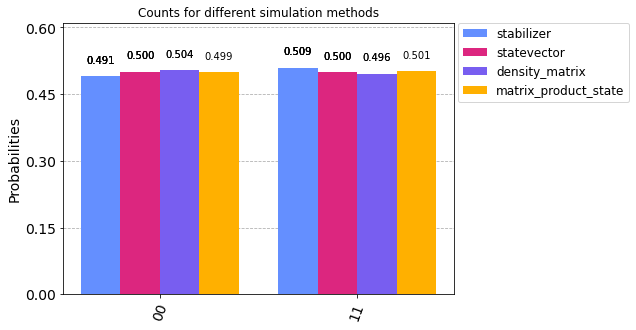

In [81]:
# Increase shots to reduce sampling variance
shots = 10000

# Stabilizer simulation method
sim_stabilizer = Aer.get_backend('aer_simulator_stabilizer')
job_stabilizer = sim_stabilizer.run(circ, shots=shots)
counts_stabilizer = job_stabilizer.result().get_counts(0)

# Statevector simulation method
sim_statevector = Aer.get_backend('aer_simulator_statevector')
job_statevector = sim_statevector.run(circ, shots=shots)
counts_statevector = job_statevector.result().get_counts(0)

# Density Matrix simulation method
sim_density = Aer.get_backend('aer_simulator_density_matrix')
job_density = sim_density.run(circ, shots=shots)
counts_density = job_density.result().get_counts(0)

# Matrix Product State simulation method
sim_mps = Aer.get_backend('aer_simulator_matrix_product_state')
job_mps = sim_mps.run(circ, shots=shots)
counts_mps = job_mps.result().get_counts(0)

plot_histogram([counts_stabilizer, counts_statevector, counts_density, counts_mps],
               title='Counts for different simulation methods',
               legend=['stabilizer', 'statevector',
                       'density_matrix', 'matrix_product_state'])

The default simulation method is automatic which will automatically select a one of the other simulation methods for each circuit based on the instructions in those circuits. A fixed simulation method can be specified by by adding the method name when getting the backend, or by setting the method option on the backend.

##### GPU simulation

The statevector, density_matrix and unitary simulators support running on a NVidia GPUs. For these methods the simulation device can also be manually set to CPU or GPU using ``simulator.set_options(device='GPU')`` backend option. If a GPU device is not available setting this option will raise an exception.

In [82]:
from qiskit.providers.aer import AerError

# Initialize a GPU backend

try:
    simulator_gpu = Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device='GPU')
except AerError as e:
    print(e)

The Aer provider will also contain preconfigured GPU simulator backends if Qiskit Aer was installed with GPU support on a compatible system:

* ``aer_simulator_statevector_gpu``
* ``aer_simulator_density_matrix_gpu``
* ``aer_simulator_unitary_gpu``

Note: The GPU version of Aer can be installed using ``pip install qiskit-aer-gpu``.

##### Simulation precision

One of the available simulator options allows setting the float precision for the statevector, density_matrix unitary and superop methods. This is done using the ``set_precision="single"`` or ``precision="double" `` (default) option:

In [83]:
# Configure a single-precision statevector simulator backend
simulator = Aer.get_backend('aer_simulator_statevector')
simulator.set_options(precision='single')

# Run and get counts
result = simulator.run(circ).result()
counts = result.get_counts(circ)
print(counts)

{'11': 523, '00': 501}


Setting the simulation precision applies to both CPU and GPU simulation devices. Single precision will halve the required memory and may provide performance improvements on certain systems.

##### Can we simulate noise?

##### Device backend noise model simulations

We will now show how to use the Qiskit Aer noise module to automatically generate a basic noise model for an IBMQ hardware device, and use this model to do noisy simulations of QuantumCircuits to study the effects of errors which occur on real devices.

Note, that these automatic models are only an approximation of the real errors that occur on actual devices, due to the fact that they must be build from a limited set of input parameters related to average error rates on gates. The study of quantum errors on real devices is an active area of research and we discuss the Qiskit Aer tools for configuring more detailed noise models in another notebook.

In [84]:
from qiskit import IBMQ, transpile
from qiskit import QuantumCircuit
from qiskit.providers.aer import AerSimulator
from qiskit.tools.visualization import plot_histogram

The Qiskit Aer device noise model automatically generates a simplified noise model for a real device. This model is generated using the calibration information reported in the ``BackendProperties`` of a device and takes into account

* The gate_error probability of each basis gate on each qubit.
* The gate_length of each basis gate on each qubit.
* The T1, T2 relaxation time constants of each qubit.
* The readout error probability of each qubit.

We will use real noise data for an IBM Quantum device using the data stored in Qiskit Terra. Specifically, in this tutorial, the device is ``ibmq_vigo```.

In [85]:
from qiskit.test.mock import FakeVigo
device_backend = FakeVigo()

Now we construct a test circuit to compare the output of the real device with the noisy output simulated on the Qiskit Aer AerSimulator. Before running with noise or on the device we show the ideal expected output with no noise.

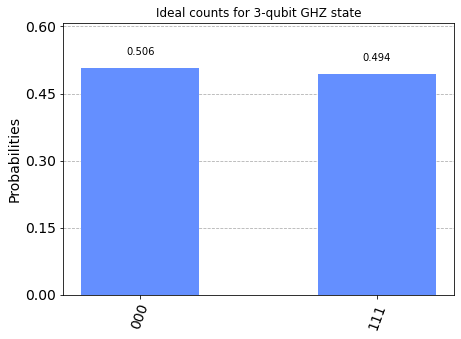

In [86]:
# Construct quantum circuit
circ = QuantumCircuit(3, 3)
circ.h(0)
circ.cx(0, 1)
circ.cx(1, 2)
circ.measure([0, 1, 2], [0, 1, 2])

sim_ideal = AerSimulator()

# Execute and get counts
result = sim_ideal.run(transpile(circ, sim_ideal)).result()
counts = result.get_counts(0)
plot_histogram(counts, title='Ideal counts for 3-qubit GHZ state')

How to generate a simulator that mimics a device?


We call ``from_backend`` to create a simulator for ``ibmq_vigo``

In [87]:
sim_vigo = AerSimulator.from_backend(device_backend)

By storing the device properties in ``vigo_simulator``, we ensure that the appropriate basis gates and coupling map are used when compiling circuits for simulation, thereby most closely mimicking the gates that will be executed on a real device. In addition ``vigo_simulator`` contains an approximate noise model consisting of:

* Single-qubit gate errors consisting of a single qubit depolarizing error followed by a single qubit thermal relaxation error.
* Two-qubit gate errors consisting of a two-qubit depolarizing error followed by single-qubit thermal relaxation errors on both qubits in the gate.
* Single-qubit readout errors on the classical bit value obtained from measurements on individual qubits.

For the gate errors the error parameter of the thermal relaxation errors is derived using the ``thermal_relaxation_error`` function from ``aer.noise.errors module``, along with the individual qubit T1 and T2 parameters, and the ``gate_time`` parameter from the device backend properties. The probability of the depolarizing error is then set so that the combined average gate infidelity from the depolarizing error followed by the thermal relaxation is equal to the ``gate_error`` value from the backend properties.

For the readout errors the probability that the recorded classical bit value will be flipped from the true outcome after a measurement is given by the qubit ``readout_errors``.

Once we have created a noisy simulator backend based on a real device we can use it to run noisy simulations.

Important: When running noisy simulations it is critical to transpile the circuit for the backend so that the circuit is transpiled to the correct noisy basis gate set for the backend.

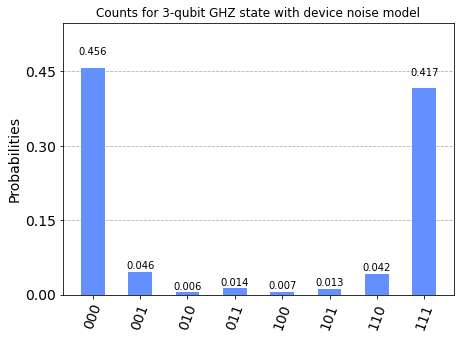

In [88]:
# Transpile the circuit for the noisy basis gates
tcirc = transpile(circ, sim_vigo)

# Execute noisy simulation and get counts
result_noise = sim_vigo.run(tcirc).result()
counts_noise = result_noise.get_counts(0)
plot_histogram(counts_noise,
               title="Counts for 3-qubit GHZ state with device noise model")

You may also be interested in:
* Building Noise Models https://qiskit.org/documentation/tutorials/simulators/3_building_noise_models.html

* Applying noise to custom unitary gates https://qiskit.org/documentation/tutorials/simulators/4_custom_gate_noise.html

##  2. Introduction to Quantum Gates and Circuits. Building Circuits with multiple components.

### Quantum Circuit Properties

When constructing quantum circuits, there are several properties that help quantify the “size” of the circuits, and their ability to be run on a noisy quantum device. Some of these, like number of qubits, are straightforward to understand, while others like depth and number of tensor components require a bit more explanation. Here we will explain all of these properties, and, in preparation for understanding how circuits change when run on actual devices, highlight the conditions under which they change.

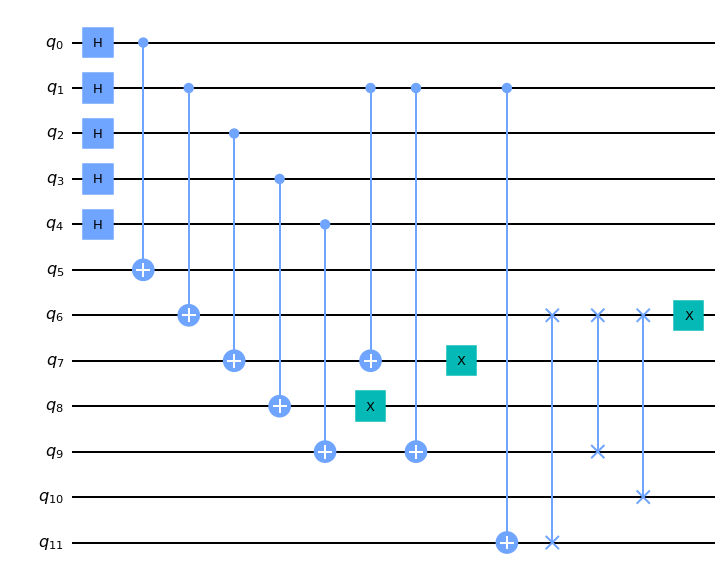

In [90]:
qc = QuantumCircuit(12)
for idx in range(5):
   qc.h(idx)
   qc.cx(idx, idx+5)

qc.cx(1, 7)
qc.x(8)
qc.cx(1, 9)
qc.x(7)
qc.cx(1, 11)
qc.swap(6, 11)
qc.swap(6, 9)
qc.swap(6, 10)
qc.x(6)
qc.draw(output="mpl")

From the plot, it is easy to see that this circuit has 12 qubits, and a collection of Hadamard, CNOT, X, and SWAP gates. But how to quantify this programmatically? Because we can do single-qubit gates on all the qubits simultaneously, the number of qubits in this circuit is equal to the width of the circuit:

In [91]:
qc.width()

12

We can also just get the number of qubits directly:

In [92]:
qc.num_qubits

12

**IMPORTANT**

For a quantum circuit composed from just qubits, the circuit width is equal to the number of qubits. This is the definition used in quantum computing. However, for more complicated circuits with classical registers, and classically controlled gates, this equivalence breaks down. As such, from now on we will not refer to the number of qubits in a quantum circuit as the width


It is also straightforward to get the number and type of the gates in a circuit using `QuantumCircuit.count_ops()`:

In [93]:
qc.count_ops()

OrderedDict([('cx', 8), ('h', 5), ('x', 3), ('swap', 3)])

We can also get just the raw count of operations by computing the circuits `QuantumCircuit.size()`:

In [94]:
qc.size()

19

A particularly important circuit property is known as the circuit depth. The depth of a quantum circuit is a measure of how many “layers” of quantum gates, executed in parallel, it takes to complete the computation defined by the circuit. Because quantum gates take time to implement, the depth of a circuit roughly corresponds to the amount of time it takes the quantum computer to execute the circuit. Thus, the depth of a circuit is one important quantity used to measure if a quantum circuit can be run on a device.

In [95]:
qc.depth()

9

### Final Statevector and Unitary

To save the final statevector of the simulation we can append the circuit with the ``save_statevector`` instruction. Note that this instruction should be applied before any measurements if we do not want to save the collapsed post-measurement state

In [96]:
# Saving the final statevector
# Construct quantum circuit without measure

from qiskit.visualization import array_to_latex

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.save_statevector()

backend = Aer.get_backend('aer_simulator')
result = backend.run(circuit).result()
array_to_latex(result.get_statevector())

<IPython.core.display.Latex object>

To save the unitary matrix for a ``QuantumCircuit`` we can append the circuit with the ``save_unitary`` instruction. Note that this circuit cannot contain any measurements or resets since these instructions are not supported on for the ``"unitary"`` simulation method

In [97]:
# Saving the circuit unitary
# Construct quantum circuit without measure

circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.save_unitary()

result = backend.run(circuit).result()
array_to_latex(result.get_unitary())

<IPython.core.display.Latex object>

We can also apply save instructions at multiple locations in a circuit. Note that when doing this we must provide a unique label for each instruction to retrieve them from the results.

In [98]:
# Saving multiple states
# Construct quantum circuit without measure

steps = 5
circ = QuantumCircuit(1)
for i in range(steps):
    circ.save_statevector(label=f'psi_{i}')
    circ.rx(i * np.pi / steps, 0)
circ.save_statevector(label=f'psi_{steps}')

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
data = result.data(0)
data

{'psi_5': Statevector([-1.+0.00000000e+00j,  0.-5.55111512e-17j],
             dims=(2,)),
 'psi_3': Statevector([0.58778525+0.j        , 0.        -0.80901699j],
             dims=(2,)),
 'psi_2': Statevector([0.95105652+0.j        , 0.        -0.30901699j],
             dims=(2,)),
 'psi_0': Statevector([1.+0.j, 0.+0.j],
             dims=(2,)),
 'psi_4': Statevector([-0.30901699+0.j        ,  0.        -0.95105652j],
             dims=(2,)),
 'psi_1': Statevector([1.+0.j, 0.+0.j],
             dims=(2,))}

##### Setting a custom statevector

The ``set_statevector`` instruction can be used to set a custom Statevector state. The input statevector must be valid.

In [99]:
# Generate a random statevector
num_qubits = 2
psi = qi.random_statevector(2 ** num_qubits, seed=100)

# Set initial state to generated statevector
circ = QuantumCircuit(num_qubits)
circ.set_statevector(psi)
circ.save_state()

# Transpile for simulator
simulator = Aer.get_backend('aer_simulator')
circ = transpile(circ, simulator)

# Run and get saved data
result = simulator.run(circ).result()
result.data(0)

{'statevector': Statevector([ 0.18572453-0.03102771j, -0.26191269-0.18155865j,
               0.12367038-0.47837907j,  0.66510011-0.4200986j ],
             dims=(2, 2))}

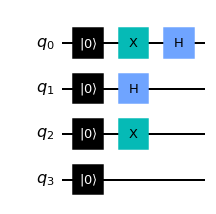

In [101]:
# Initialization (Using the initialize instruction)

qc = QuantumCircuit(4)

qc.initialize('01+-')
qc.draw()
qc.decompose().draw(output="mpl")

<IPython.core.display.Latex object>

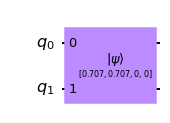

In [103]:
# Initialization

import math

desired_vector = [1 / math.sqrt(2), 1 / math.sqrt(2), 0, 0]
display(array_to_latex(desired_vector))


qc = QuantumCircuit(2)
qc.initialize(desired_vector, [0, 1])
qc.draw(output="mpl")

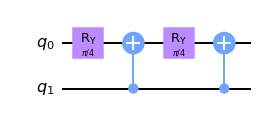

In [105]:
from qiskit import transpile
simulator = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, simulator, basis_gates=['x', 'cx', 'ry', 'rz'], optimization_level=3)
#qc_transpiled = transpile(qc, simulator, optimization_level=3)
#qc_transpiled.decompose().decompose().decompose().decompose().draw()
qc_transpiled.draw(output="mpl")

There is another option to initalize the circuit to a desired quantum state. 
We use ` qiskit.circuit.QuantumCircuit.isometry` In general, it is used for attaching an arbitrary isometry from m to n qubits to a circuit. In particular, this allows to attach arbitrary unitaries on n qubits (m=n) or to prepare any state on n qubits (m=0). The decomposition used here was introduced by Iten et al. in https://arxiv.org/abs/1501.06911. This is important because in many experimental architectures, the C-NOT gate is relatively 'expensive' and hence we aim to keep the number of these as low as possible. 

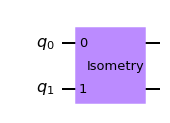

In [107]:
# Isometry
qc = QuantumCircuit(2)
qc.isometry(desired_vector, q_input=[],q_ancillas_for_output=[0,1])
qc.draw(output="mpl")

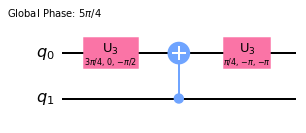

In [108]:
simulator = Aer.get_backend('aer_simulator')
qc_transpiled = transpile(qc, simulator, optimization_level=3)
qc_transpiled.draw(output="mpl")

Let's compare both circuit outputs. Which one has more gates?

### Other components

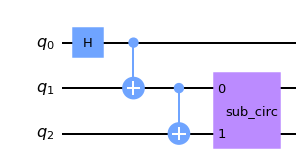

In [110]:
#Composite gates

# Build a sub-circuit
sub_q = QuantumRegister(2)
sub_circ = QuantumCircuit(sub_q, name='sub_circ')
sub_circ.h(sub_q[0])
sub_circ.crz(1, sub_q[0], sub_q[1])
sub_circ.barrier()
sub_circ.id(sub_q[1])
sub_circ.u(1, 2, -2, sub_q[0])

# Convert to a gate and stick it into an arbitrary place in the bigger circuit
sub_inst = sub_circ.to_instruction()

qr = QuantumRegister(3, 'q')
circ = QuantumCircuit(qr)
circ.h(qr[0])
circ.cx(qr[0], qr[1])
circ.cx(qr[1], qr[2])
circ.append(sub_inst, [qr[1], qr[2]])

circ.draw(output="mpl")

Circuits are not immediately decomposed upon conversion to_instruction to allow circuit design at higher levels of abstraction. When desired, or before compilation, sub-circuits will be decomposed via the decompose method.

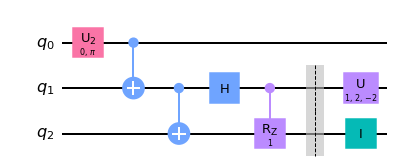

In [112]:
decomposed_circ = circ.decompose() # Does not modify original circuit
decomposed_circ.draw(output="mpl")

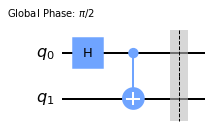

<IPython.core.display.Latex object>

In [114]:
# Circuit with Global Phase

circuit = QuantumCircuit(2)
circuit.h(0)
#circuit.save_unitary()
circuit.cx(0, 1)
circuit.global_phase = np.pi / 2
circuit.save_unitary()

display(circuit.draw(output="mpl"))
#backend = Aer.get_backend('unitary_simulator')
backend = Aer.get_backend('aer_simulator_unitary')
result = backend.run(circuit).result()
array_to_latex(result.get_unitary())

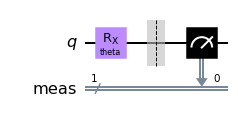

In [115]:
# Parameterized Quantum Circuits 

from qiskit.circuit import Parameter
theta = Parameter('theta')

circuit = QuantumCircuit(1)
circuit.rx(theta, 0)
circuit.measure_all()
circuit.draw(output="mpl")

In [118]:
sim = Aer.get_backend('aer_simulator')
res = sim.run(circuit, parameter_binds=[{theta: [np.pi/2, np.pi, 0]}]).result()  # Different bindings
res.get_counts()

[{'1': 496, '0': 528}, {'1': 1024}, {'0': 1024}]

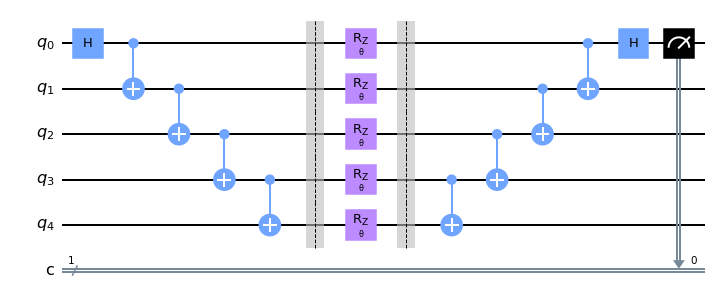

In [119]:
from qiskit.circuit import Parameter

theta = Parameter('θ')

n = 5

qc = QuantumCircuit(5, 1)

qc.h(0)
for i in range(n-1):
    qc.cx(i, i+1)

qc.barrier()
qc.rz(theta, range(5))
qc.barrier()

for i in reversed(range(n-1)):
    qc.cx(i, i+1)
qc.h(0)
qc.measure(0, 0)

qc.draw('mpl')

In [120]:
#We can inspect the circuit’s parameters
print(qc.parameters)

ParameterView([Parameter(θ)])


All circuit parameters must be bound before sending the circuit to a backend. This can be done as follows: - The``bind_parameters`` method accepts a dictionary mapping ``Parameter``s to values, and returns a new circuit with each parameter replaced by its corresponding value. Partial binding is supported, in which case the returned circuit will be parameterized by any ``Parameter``s that were not mapped to a value.

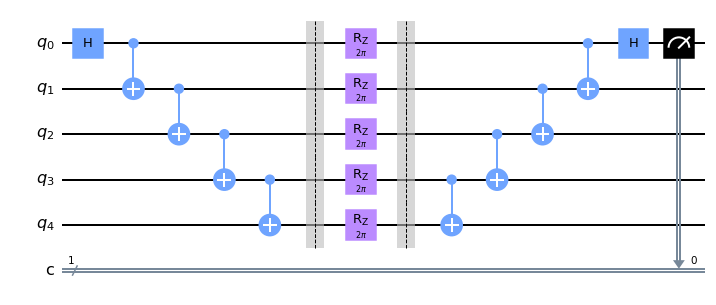

In [122]:
import numpy as np

theta_range = np.linspace(0, 2 * np.pi, 128)

circuits = [qc.bind_parameters({theta: theta_val})
            for theta_val in theta_range]

circuits[-1].draw('mpl')

In [123]:
backend = Aer.get_backend('aer_simulator')
job = backend.run(transpile(circuits, backend))
counts = job.result().get_counts()

In the example circuit, we apply a global Rz(θ) rotation on a five-qubit entangled state, and so expect to see oscillation in qubit-0 at 5θ.

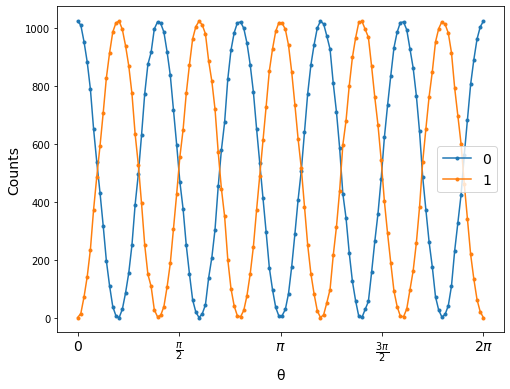

In [124]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(theta_range, list(map(lambda c: c.get('0', 0), counts)), '.-', label='0')
ax.plot(theta_range, list(map(lambda c: c.get('1', 0), counts)), '.-', label='1')

ax.set_xticks([i * np.pi / 2 for i in range(5)])
ax.set_xticklabels(['0', r'$\frac{\pi}{2}$', r'$\pi$', r'$\frac{3\pi}{2}$', r'$2\pi$'], fontsize=14)
ax.set_xlabel('θ', fontsize=14)
ax.set_ylabel('Counts', fontsize=14)
ax.legend(fontsize=14)

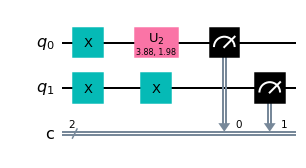

In [125]:
# Random Circuit

from qiskit.circuit.random import random_circuit

circ = random_circuit(2, 2, measure=True)
circ.draw(output='mpl')

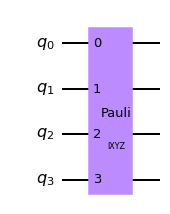

In [127]:
# Pauli
from qiskit.quantum_info.operators import Pauli

circuit = QuantumCircuit(4)
IXYZ = Pauli('IXYZ')
circuit.append(IXYZ, [0, 1, 2, 3])
circuit.draw('mpl')
# circuit.decompose().draw()

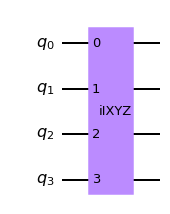

In [129]:
# Pauli with phase 
from qiskit.quantum_info.operators import Pauli

circuit = QuantumCircuit(4)
iIXYZ = Pauli('iIXYZ')  # ['', '-i', '-', 'i']
circuit.append(iIXYZ, [0, 1, 2, 3])
circuit.draw('mpl')

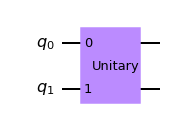

In [131]:
# Any unitary!
matrix = [[0, 0, 0, 1],
          [0, 0, 1, 0],
          [1, 0, 0, 0],
          [0, 1, 0, 0]]
          
circuit = QuantumCircuit(2)
circuit.unitary(matrix, [0, 1])
circuit.draw('mpl')
# circuit.decompose().draw() #synthesis

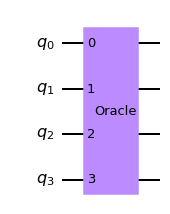

In [132]:
# Classical logic
from qiskit.circuit import classical_function, Int1

@classical_function
def oracle(x: Int1, y: Int1, z: Int1) -> Int1:
    return not x and (y or z)

circuit = QuantumCircuit(4)
circuit.append(oracle, [0, 1, 2, 3])
circuit.draw('mpl')
# circuit.decompose().draw() #synthesis

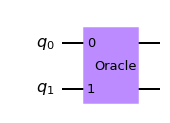

In [133]:
# Classical logic
from qiskit.circuit import classical_function, Int1
@classical_function
def oracle(x: Int1) -> Int1:
    return not x
circuit = QuantumCircuit(2)
circuit.append(oracle, [0, 1])
circuit.draw('mpl')
# circuit.decompose().draw() #synthesis

##### How to create an operator?

https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html

## 3. Run on real hardware. Compiling Circuits


The backends we have access to

In [157]:
# If you have access to more than one hub:
provider = IBMQ.get_provider(hub='ibm-q-education', group='mid-east-tech-un-1')
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

[('ibmq_qasm_simulator', 32),
 ('ibmq_armonk', 1),
 ('ibmq_santiago', 5),
 ('ibmq_bogota', 5),
 ('ibmq_casablanca', 7),
 ('ibmq_lima', 5),
 ('ibmq_belem', 5),
 ('ibmq_quito', 5),
 ('simulator_statevector', 32),
 ('simulator_mps', 100),
 ('simulator_extended_stabilizer', 63),
 ('simulator_stabilizer', 5000),
 ('ibmq_jakarta', 7),
 ('ibmq_manila', 5),
 ('ibm_lagos', 7),
 ('ibm_perth', 7)]

In [162]:
from qiskit.tools.jupyter import *
backend = provider.get_backend('ibm_perth')
backend

<IBMQBackend('ibm_perth') from IBMQ(hub='ibm-q-education', group='mid-east-tech-un-1', project='2300343-Intro-Computational-Methods')>

In [163]:
Not working at the moment
#from qiskit.providers.ibmq import least_busy
#
#backend = least_busy(provider.backends(
#                simulator=False,
#                filters=lambda b: b.configuration().n_qubits >= 2))
#backend

RequestsApiError: '404 Client Error: Not Found for url: https://api-qcon.quantum-computing.ibm.com/api/Network/ibm-q-education/Groups/mid-east-tech-un-1/Projects/2300343-Intro-Computational-Methods/devices/ibmq_casablanca/queue/status. Invalid Hub/Group/Project., Error code: 2911.'

Let's go back to Bell state

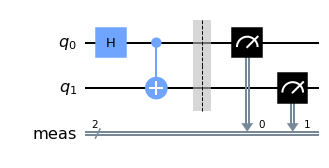

In [165]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw('mpl')

Remember how to run it in a simulator?

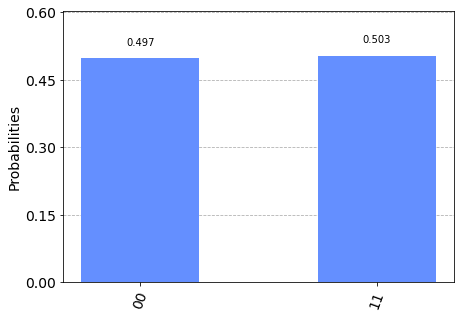

In [166]:
sim = Aer.get_backend('aer_simulator')
result = sim.run(circuit).result()
counts = result.get_counts()
plot_histogram(counts)

In [171]:
%qiskit_job_watcher
job = backend.run(circuit)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [172]:
job.result()

IBMQJobFailureError: "Unable to retrieve result for job 624df9c54b51521bae7c66c3. Job has failed: The Qobj uses gates (['h']) that are not among the basis gates (['id', 'rz', 'sx', 'x', 'cx', 'reset']). Error code: 1106."

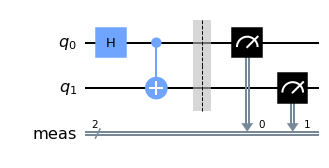

In [173]:
circuit.draw('mpl')

In [174]:
from qiskit import transpile

transpiled_circuit = transpile(circuit, backend)
transpiled_circuit.draw('mpl')

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_3 -> 5 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_4 -> 6 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1

In [175]:
job = backend.run(transpiled_circuit)

In [176]:
job.status()

<JobStatus.QUEUED: 'job is queued'>

In [ ]:
result = job.result()
counts = result.get_counts()
plot_histogram(counts)

In [ ]:
from qiskit.visualization import plot_circuit_layout, plot_gate_map

display(transpiled_circuit.draw(idle_wires=False))
display(plot_gate_map(backend))
plot_circuit_layout(transpiled_circuit, backend)

In [ ]:
# a slightly more interesting example:
circuit = QuantumCircuit(3)
circuit.h([0,1,2])
circuit.ccx(0, 1, 2)
circuit.h([0,1,2])
circuit.ccx(2, 0, 1)
circuit.h([0,1,2])
circuit.measure_all()
circuit.draw()

In [ ]:
transpiled = transpile(circuit, backend)
transpiled.draw(idle_wires=False, fold=-1)

Initial layout

In [ ]:
transpiled = transpile(circuit, backend, initial_layout=[0, 2, 3])
display(plot_circuit_layout(transpiled, backend))
plot_gate_map(backend)

In [ ]:
transpiled.draw(idle_wires=False, fold=-1)

### Optimization level

Higher levels generate more optimized circuits, at the expense of longer transpilation time.

 * 0: no explicit optimization other than mapping to backend
 * 1: light optimization by simple adjacent gate collapsing.(default)
 * 2: medium optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules.
 * 3: heavy optimization by noise adaptive qubit mapping and gate cancellation using commutativity rules and unitary synthesis.

In [ ]:
level0 = transpile(circuit, backend, optimization_level=0)
level1 = transpile(circuit, backend, optimization_level=1)
level2 = transpile(circuit, backend, optimization_level=2)
level3 = transpile(circuit, backend, optimization_level=3)

In [ ]:
for level in [level0, level1, level2, level3]:
    print(level.count_ops()['cx'], level.depth())

Transpiling is a stochastic process

In [ ]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=0)
transpiled.depth()

In [ ]:
transpiled = transpile(circuit, backend, optimization_level=2, seed_transpiler=1)
transpiled.depth()

Playing with other transpiler options (without a backend)

In [ ]:
transpiled = transpile(circuit)
transpiled.draw(fold=-1)

Set a basis gates

In [ ]:
backend.configuration().basis_gates

In [ ]:
transpiled = transpile(circuit, basis_gates=['x', 'cx', 'h', 'p'])
transpiled.draw(fold=-1)

Set a coupling map

In [ ]:
backend.configuration().coupling_map

In [ ]:
from qiskit.transpiler import CouplingMap

transpiled = transpile(circuit, coupling_map=CouplingMap([(0,1),(1,2)]))
transpiled.draw(fold=-1)

Set an initial layout in a coupling map

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2])
transpiled.draw(fold=-1)

Set an initial_layout in the coupling map with basis gates

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p']
                      )
transpiled.draw(fold=-1)

In [ ]:
transpiled.count_ops()['cx']

Plus optimization level

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

In [ ]:
transpiled.count_ops()['cx']

Last parameter, approximation degree

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.99,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

In [ ]:
transpiled.depth()

In [ ]:
transpiled = transpile(circuit,
                       coupling_map=CouplingMap([(0,1),(1,2)]),
                       initial_layout=[1, 0, 2],
                       basis_gates=['x', 'cx', 'h', 'p'],
                       approximation_degree=0.01,
                       optimization_level=3
                      )
transpiled.draw(fold=-1)

In [ ]:
transpiled.depth()

Qiskit is hardware agnostic!

In [ ]:
!pip install qiskit-ionq

In [ ]:
from qiskit_ionq import IonQProvider
provider = IonQProvider(<your token>)

In [ ]:
[(b.name(), b.configuration().n_qubits) for b in provider.backends()]

In [ ]:
circuit = QuantumCircuit(2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure_all()
circuit.draw()

In [ ]:
backend = provider.get_backend("ionq_qpu")
job = backend.run(circuit)

In [ ]:
plot_histogram()

In [ ]:
job.get_counts()

In [ ]:
plot_histogram(job.get_counts())